In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [37]:
loan_perf = pd.read_csv('loan_perf_18_20_sf.csv')

In [38]:
loan_perf

,credit_score,first_payment_date,first_time_homebuyer_flag,maturity_date,metropolitan_area,mortgage_insurance_percentage,number_of_units,occupancy_status,original_combined_loan-to-value,original_debt-to-income_ratio,...,current_actual_upb,current_loan_delinquency_status,loan_age,remaining_months_to_legal_maturity,current_interest_rate,current_deferred_upb,estimated_loan-to-value,zero_balance_code,zero_balance_effective_date,zero_balance_removal_upb
0,733,201803,9,204802,36084.0,0,1,I,79,25,...,429000.0,0,0,360,4.750,0.0,77.0,NaN,NaN,NaN
1,733,201803,9,204802,36084.0,0,1,I,79,25,...,429000.0,0,1,359,4.750,0.0,75.0,NaN,NaN,NaN
2,733,201803,9,204802,36084.0,0,1,I,79,25,...,429000.0,0,2,358,4.750,0.0,74.0,NaN,NaN,NaN
3,733,201803,9,204802,36084.0,0,1,I,79,25,...,428000.0,0,3,357,4.750,0.0,73.0,NaN,NaN,NaN
4,733,201803,9,204802,36084.0,0,1,I,79,25,...,427000.0,0,4,356,4.750,0.0,75.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727495,778,202011,9,205010,36084.0,0,1,P,45,24,...,672000.0,0,2,358,3.000,0.0,NaN,NaN,NaN,NaN
727496,806,202012,9,205011,41884.0,0,1,P,43,46,...,406000.0,0,1,360,3.125,0.0,NaN,NaN,NaN,NaN
727497,806,202012,9,205011,41884.0,0,1,P,43,46,...,406000.0,0,2,359,3.125,0.0,NaN,NaN,NaN,NaN
727498,767,202011,9,205010,36084.0,0,1,P,73,43,...,714000.0,0,1,359,2.875,0.0,NaN,NaN,NaN,NaN


In [39]:
loan_perf = loan_perf[['loan_sequence_number', 'monthly_reporting_period',
       'current_actual_upb', 'original_upb', 'loan_age', 'maturity_date', 
       'remaining_months_to_legal_maturity','credit_score',
       'original_interest_rate','current_interest_rate', 
       'estimated_loan-to-value', 
       'first_payment_date', 'first_time_homebuyer_flag',
       'metropolitan_area', 'mortgage_insurance_percentage', 'number_of_units',
       'occupancy_status', 'original_combined_loan-to-value', 'original_loan-to-value', 
       'original_debt-to-income_ratio',
       'property_type', 'postal_code',
       'original_loan_term', 'zero_balance_code', 'zero_balance_effective_date', 'zero_balance_removal_upb']]

In [40]:
# converting date, getting year and month
loan_perf['date'] = pd.to_datetime(loan_perf['monthly_reporting_period'].apply(lambda x: str(x)[:4]+'/'+str(x)[-2:]+'/01'))
loan_perf['first_payment_date'] = pd.to_datetime(loan_perf['first_payment_date'].apply(lambda x: str(x)[:4]+'/'+str(x)[-2:]+'/01'))
loan_perf['year'] = loan_perf['date'].dt.year
loan_perf['month'] = loan_perf['date'].dt.month
loan_perf['first_payment_year'] = loan_perf['first_payment_date'].dt.year
loan_perf['first_payment_month'] = loan_perf['first_payment_date'].dt.month
loan_perf.drop(['monthly_reporting_period', 'first_payment_date'], axis=1, inplace=True)

# converting postal code and MSA to string
loan_perf['postal_code'] = loan_perf['postal_code'].astype(str)
loan_perf['metropolitan_area'] = loan_perf['metropolitan_area'].astype(str)

# getting loan monthly payment amount
loan_perf['payment']=loan_perf.groupby(['loan_sequence_number'])['current_actual_upb'].diff().fillna(0)*-1

<ipython-input-40-32a7ffded87e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_perf['date'] = pd.to_datetime(loan_perf['monthly_reporting_period'].apply(lambda x: str(x)[:4]+'/'+str(x)[-2:]+'/01'))
<ipython-input-40-32a7ffded87e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_perf['first_payment_date'] = pd.to_datetime(loan_perf['first_payment_date'].apply(lambda x: str(x)[:4]+'/'+str(x)[-2:]+'/01'))
<ipython-input-40-32a7ffded87e>:4: SettingWithCopyWarning: 
A value is trying to be set on a c

## Distribution of payment amount for paid off loans

<AxesSubplot:ylabel='Frequency'>

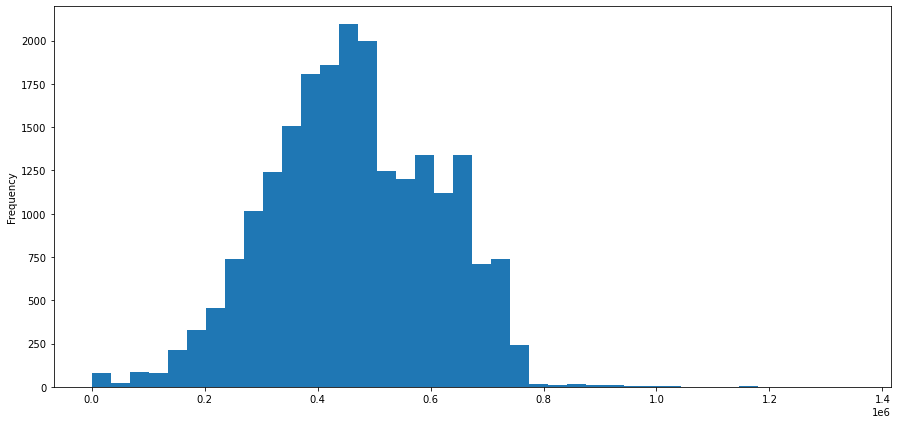

In [41]:
loan_perf[loan_perf['zero_balance_code'].isna() != True]['payment'].plot.hist(bins=40, figsize=(15,7))

## Getting only the loans that are not prematurely paid off to get only normal monthly payments

In [44]:
# loan_perf[loan_perf['zero_balance_code'].isna() == True].shape[0]
# loan_perf[loan_perf['zero_balance_code'].isna() != True]
loan_perf = loan_perf[(loan_perf['zero_balance_effective_date'] < loan_perf['maturity_date']) != True]

In [45]:
loan_perf

,loan_sequence_number,current_actual_upb,original_upb,loan_age,maturity_date,remaining_months_to_legal_maturity,credit_score,original_interest_rate,current_interest_rate,estimated_loan-to-value,...,original_loan_term,zero_balance_code,zero_balance_effective_date,zero_balance_removal_upb,date,year,month,first_payment_year,first_payment_month,payment
0,F18Q10002708,429000.0,429000,0,204802,360,733,4.750,4.750,77.0,...,360,NaN,NaN,NaN,2018-02-01,2018,2,2018,3,-0.0
1,F18Q10002708,429000.0,429000,1,204802,359,733,4.750,4.750,75.0,...,360,NaN,NaN,NaN,2018-03-01,2018,3,2018,3,-0.0
2,F18Q10002708,429000.0,429000,2,204802,358,733,4.750,4.750,74.0,...,360,NaN,NaN,NaN,2018-04-01,2018,4,2018,3,-0.0
3,F18Q10002708,428000.0,429000,3,204802,357,733,4.750,4.750,73.0,...,360,NaN,NaN,NaN,2018-05-01,2018,5,2018,3,1000.0
4,F18Q10002708,427000.0,429000,4,204802,356,733,4.750,4.750,75.0,...,360,NaN,NaN,NaN,2018-06-01,2018,6,2018,3,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727495,F20Q31187207,672000.0,675000,2,205010,358,778,3.000,3.000,NaN,...,360,NaN,NaN,NaN,2020-12-01,2020,12,2020,11,1000.0
727496,F20Q31187389,406000.0,407000,1,205011,360,806,3.125,3.125,NaN,...,360,NaN,NaN,NaN,2020-11-01,2020,11,2020,12,-0.0
727497,F20Q31187389,406000.0,407000,2,205011,359,806,3.125,3.125,NaN,...,360,NaN,NaN,NaN,2020-12-01,2020,12,2020,12,-0.0
727498,F20Q31187407,714000.0,718000,1,205010,359,767,2.875,2.875,NaN,...,360,NaN,NaN,NaN,2020-11-01,2020,11,2020,11,-0.0


## Mortgage payments vs Rent

In [46]:
%load_ext autoreload
%autoreload
from transformers import *

In [47]:
zillow = transform_zillow('Zip_Zri_SingleFamilyResidenceRental.csv')

In [48]:
counties = ['Alameda County', 'Contra Costa County', 'Marin County', 'Napa County', 'San Mateo County', 
            'Santa Clara County', 'Solano County', 'Sonoma County', 'San Francisco County']

In [49]:
zillow = zillow[zillow['County'].isin(counties)]
zipcodes = zillow['Zipcode'].unique().tolist()

In [50]:
zillow = transform_zori('Zip_ZORI_AllHomesPlusMultifamily_SSA.csv')

In [51]:
zillow = zillow[zillow['Zipcode'].isin(zipcodes)]

In [52]:
zillow

,Zipcode,SizeRank,MsaName,Date,Rent,Year
28548,94109,14,"San Francisco, CA",2015-01-01,2876.0,2015
28570,94565,41,"San Francisco, CA",2015-01-01,1581.0,2015
28606,94501,89,"San Francisco, CA",2015-01-01,1846.0,2015
28611,94110,95,"San Francisco, CA",2015-01-01,3566.0,2015
28698,94536,231,"San Francisco, CA",2015-01-01,2248.0,2015
...,...,...,...,...,...,...
206630,95054,4707,"San Jose, CA",2021-03-01,3485.0,2021
206644,94506,4774,"San Francisco, CA",2021-03-01,3870.0,2021
206673,94105,4888,"San Francisco, CA",2021-03-01,3125.0,2021
206802,94965,6225,"San Francisco, CA",2021-03-01,3463.0,2021


In [53]:
zillow['Month'] = zillow['Date'].dt.month

In [54]:
zillow.head()

,Zipcode,SizeRank,MsaName,Date,Rent,Year,Month
28548,94109,14,"San Francisco, CA",2015-01-01,2876.0,2015,1
28570,94565,41,"San Francisco, CA",2015-01-01,1581.0,2015,1
28606,94501,89,"San Francisco, CA",2015-01-01,1846.0,2015,1
28611,94110,95,"San Francisco, CA",2015-01-01,3566.0,2015,1
28698,94536,231,"San Francisco, CA",2015-01-01,2248.0,2015,1


In [55]:
zillow['Zipcode_00'] = zillow['Zipcode'].apply(lambda x: x[:3]+'00')
zillow = zillow[zillow['Zipcode_00'].isin(list(loan_perf['postal_code'].unique()))]
df_zillow = zillow.groupby(['Zipcode_00', 'Year', 'Month']).mean().reset_index()[['Zipcode_00', 'Year', 'Month','Rent']]
df_zillow.rename(columns={'Zipcode_00': 'postal_code', 'Year': 'year', 'Month': 'month', 'Rent': 'rent'}, inplace=True)

## Deriving a monthly mean payment by zipcode

#### Getting nonzero payments to calculate mean monthly payment

In [117]:
loan_perf_nonzero_payments = loan_perf[loan_perf['payment'] > 0]

#### Getting a median payment per loan to get rid of large one-time-payments

In [118]:
median_payment = loan_perf_nonzero_payments.groupby('loan_sequence_number')[['payment']].median().reset_index().rename(columns={'payment':'median_payment'})

In [119]:
median_payment

,loan_sequence_number,median_payment
0,F18Q10002708,589.02
1,F18Q10002873,1741.09
2,F18Q10002989,640.84
3,F18Q10003079,591.51
4,F18Q10003123,927.11
...,...,...
73754,F20Q31185331,3000.00
73755,F20Q31185336,1000.00
73756,F20Q31185491,1000.00
73757,F20Q31185660,1000.00


<AxesSubplot:ylabel='Frequency'>

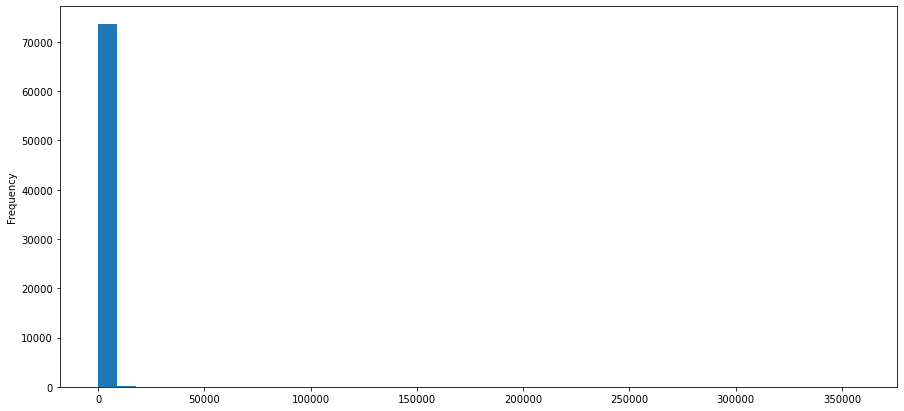

In [120]:
median_payment['median_payment'].plot.hist(bins=40, figsize=(15,7))

### Median payment still has some large payments that don't represent the average picture.
#### We will get rid of them

In [121]:
# getting a list of loan numbers that have payments over 20 000
big_payments_loans = median_payment[median_payment['median_payment'] > 20000].loan_sequence_number.unique().tolist()

In [122]:
loan_perf_nonzero_payments = loan_perf_nonzero_payments[loan_perf_nonzero_payments['loan_sequence_number'].isin(big_payments_loans) != True]

In [123]:
loan_perf_nonzero_payments = pd.merge(loan_perf_nonzero_payments, median_payment, on='loan_sequence_number')
loan_perf_nonzero_payments.sample(15)

,loan_sequence_number,current_actual_upb,original_upb,loan_age,maturity_date,remaining_months_to_legal_maturity,credit_score,original_interest_rate,current_interest_rate,estimated_loan-to-value,...,zero_balance_code,zero_balance_effective_date,zero_balance_removal_upb,date,year,month,first_payment_year,first_payment_month,payment,median_payment
0,F18Q10002708,428000.00,429000,3,204802,357,733,4.75,4.75,73.0,...,NaN,NaN,NaN,2018-05-01,2018,5,2018,3,1000.00,589.02
1,F18Q10002708,427000.00,429000,4,204802,356,733,4.75,4.75,75.0,...,NaN,NaN,NaN,2018-06-01,2018,6,2018,3,1000.00,589.02
2,F18Q10002708,426000.00,429000,6,204802,354,733,4.75,4.75,74.0,...,NaN,NaN,NaN,2018-08-01,2018,8,2018,3,1000.00,589.02
3,F18Q10002708,425374.86,429000,7,204802,353,733,4.75,4.75,75.0,...,NaN,NaN,NaN,2018-09-01,2018,9,2018,3,625.14,589.02
4,F18Q10002708,424819.73,429000,8,204802,352,733,4.75,4.75,75.0,...,NaN,NaN,NaN,2018-10-01,2018,10,2018,3,555.13,589.02


#### This distribution looks much better

<AxesSubplot:ylabel='Frequency'>

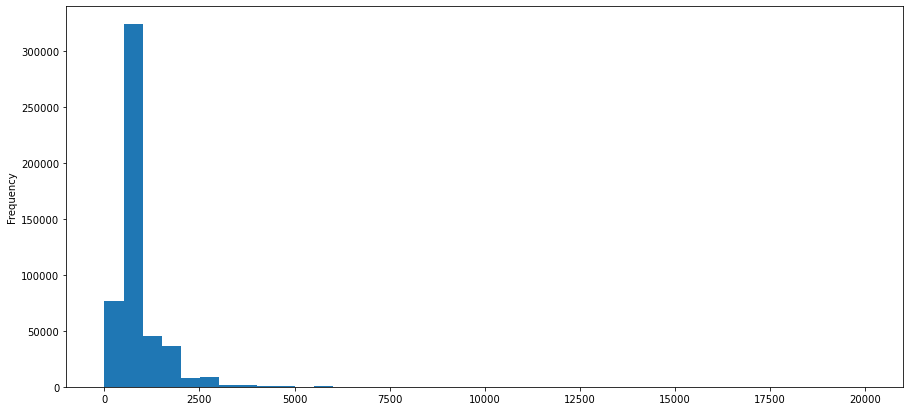

In [133]:
loan_perf_nonzero_payments['median_payment'].plot.hist(bins=40, figsize=(15,7))

#### Getting a mean loan payment per zipcode

In [134]:
monthly_pay_by_zip = loan_perf_nonzero_payments.groupby(['year', 'month', 'postal_code']).mean()[['median_payment']].\
                                                            reset_index().rename(columns={'median_payment': 'mortgage_payment'})
monthly_pay_by_zip

,year,month,postal_code,mortgage_payment
0,2018,3,94000,971.190490
1,2018,3,94100,1223.150833
2,2018,3,94300,693.627500
3,2018,3,94400,1026.671667
4,2018,3,94500,969.730019
...,...,...,...,...
291,2020,12,94500,1235.152189
292,2020,12,94600,1114.441490
293,2020,12,94700,1356.200473
294,2020,12,94800,974.568979


#### Getting a mortgage payment vs rent payment ratio

In [135]:
mortgage_vs_rent = pd.merge(df_zillow, monthly_pay_by_zip, on=['year', 'month', 'postal_code'])

In [136]:
mortgage_vs_rent['morgate_vs_rent'] = round(mortgage_vs_rent['mortgage_payment']*100/mortgage_vs_rent['rent'], 2)

In [137]:
mortgage_vs_rent['day'] = '01'
mortgage_vs_rent['date'] = pd.to_datetime(mortgage_vs_rent[['year', 'month','day']].apply(lambda row: '/'.join(row.values.astype(str)), axis=1))

In [138]:
# mortgage_vs_rent.sample(50)

In [139]:
m_vs_r = mortgage_vs_rent.pivot(index='date', values='morgate_vs_rent', columns='postal_code')
m_vs_r

postal_code,94000,94100,94300,94400,94500,94600,94700,94800,94900
date,,,,,,,,,
2018-03-01,29.77,34.37,17.14,28.52,35.80,36.12,52.60,32.07,NaN
2018-04-01,32.14,30.93,12.66,29.32,34.29,33.49,41.82,31.40,NaN
2018-05-01,30.83,29.58,18.13,26.86,34.89,34.41,35.94,36.73,NaN
2018-06-01,30.44,28.90,14.33,27.93,33.80,34.03,36.26,31.65,NaN
2018-07-01,30.41,29.34,19.29,26.91,33.68,33.97,37.26,34.48,NaN
2018-08-01,30.41,29.39,15.46,27.80,33.17,34.10,37.28,33.21,NaN
2018-09-01,29.13,28.03,17.94,27.89,32.99,33.24,35.98,32.51,NaN
2018-10-01,29.07,27.42,16.53,27.94,31.65,32.11,37.07,31.12,NaN
2018-11-01,27.49,26.52,16.60,26.58,31.07,31.42,35.36,30.65,NaN


In [140]:
ticks = m_vs_r.reset_index()['date'].astype(str).tolist()

Text(0, 0.5, 'Percent')

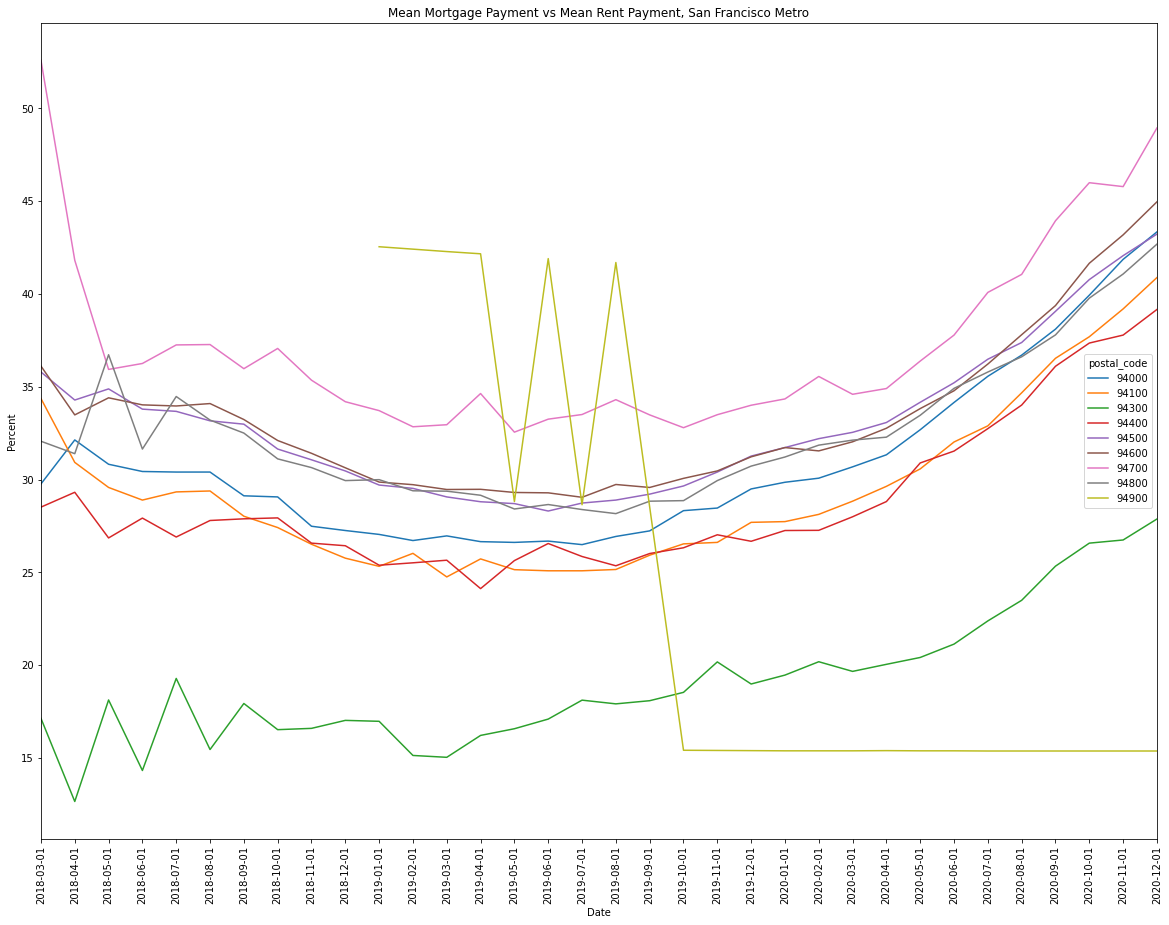

In [141]:
m_vs_r.plot.line(figsize=(20, 15), title='Mean Mortgage Payment vs Mean Rent Payment, San Francisco Metro')
plt.xticks(ticks, ticks, rotation=90)
plt.xlabel('Date')
plt.ylabel('Percent')

In [143]:
mortgage_vs_rent.to_csv('mortgage_vs_rent_sf.csv')